# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- Nama: Nazarudin Zaini
- Email: nazarzaini97@gmail.com
- Id Dicoding: nazarin

## Menentukan Pertanyaan Bisnis




1.   Kategori Produk Apa Yang Paling Laris?
2.   Bagaimana Tren Bulanan dalam jumlah penjualan?
3.   Bagaimana distribusi pelanggan terbanyak berdasarkan kota?
4.   Siapa pelanggan yang melakukan pembelian paling baru-baru ini?
5.   Siapa pelanggan yang frekuensi pembeliannya tertinggi dalam rentang beberapa bulan terakhir?
6.   Siapa pelanggan dengan pengeluaran yang paling banyak dalam rentang beberapa bulan terakhir?

## Menyaipkan semua library yang dibuthkan

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [49]:
#Load Tabel Customers
cust_df = pd.read_csv("https://raw.githubusercontent.com/nazarinz/Proyek-Analisis-Data/main/customers_dataset.csv")
cust_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [50]:
#Load Table Orders
order_df = pd.read_csv("https://raw.githubusercontent.com/nazarinz/Proyek-Analisis-Data/main/orders_dataset.csv")
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [51]:
#Load Table Orders Items
order_items_df = pd.read_csv("https://raw.githubusercontent.com/nazarinz/Proyek-Analisis-Data/main/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [52]:
#Load Tabel Produk
product_df = pd.read_csv("https://raw.githubusercontent.com/nazarinz/Proyek-Analisis-Data/main/products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Assessing Data

Menilai Data cust_df

In [53]:
# Menampilkan jumlah baris dan kolom dalam tabel
# Memeriksa kesesuaian nilai terisi atau tidak hilang dalam setiap kolom
# Menampilkan tipe data setiap kolom
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [54]:
# Menghitung jumlah baris duplikat dalam tabel
print("Jumlah duplikasi: ", cust_df.duplicated().sum())

Jumlah duplikasi:  0


Menilai Data Orders

In [55]:
# Menampilkan jumlah baris dan kolom dalam tabel
# Memeriksa kesesuaian nilai terisi atau tidak hilang dalam setiap kolom
# Menampilkan tipe data setiap kolom
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [56]:
# Memeriksa nilai yang hilang dalam setiap kolom
order_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [57]:
# Menghitung jumlah baris duplikat dalam tabel
print("Jumlah duplikasi: ", order_df.duplicated().sum())

Jumlah duplikasi:  0


In [58]:
# Menampilkan nilai unik untuk kolom order_status
print(order_df['order_status'].unique())

['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']


Menilai Data Order Items

In [59]:
# Menampilkan jumlah baris dan kolom dalam tabel
# Memeriksa kesesuaian nilai terisi atau tidak hilang dalam setiap kolom
# Menampilkan tipe data setiap kolom
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [60]:
# Menghitung jumlah baris duplikat dalam tabel
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [61]:
# Pemeriksaan nilai yang tidak masuk akal pada kolom harga produk
print(order_items_df['price'].describe())

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64


In [62]:
# Pemeriksaan nilai yang tidak masuk akal pada kolom biaya pengiriman
print(order_items_df['freight_value'].describe())

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64


In [63]:
# Menghitung jumlah nilai yang bernilai 0 pada kolom freight_value
jumlah_nilai_nol = (order_items_df['freight_value'] == 0).sum()

print("Jumlah nilai yang bernilai 0 pada kolom freight_value:", jumlah_nilai_nol)


Jumlah nilai yang bernilai 0 pada kolom freight_value: 383


### Cleaning Data

Membersihkan Data cust_df

In [64]:
# Mengubah tipe data kolom customer_zip_code_prefix menjadi objek
cust_df['customer_zip_code_prefix'] = cust_df['customer_zip_code_prefix'].astype(str)
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


Membersihkan Data order_df

In [65]:
# Konversi kolom-kolom tertentu menjadi tipe data datetime
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in datetime_columns:
    order_df[column] = pd.to_datetime(order_df[column])

order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [66]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [67]:
# Menampilkan tabel dengan nilai null pada kolom order_delivered_customer_date
null_delivered_customer_date = order_df[pd.isnull(order_df['order_delivered_customer_date'])]
print(null_delivered_customer_date)

#ohh ternyata banyak missing value karna memang datanya seperti itu dipengaruhi status order yang beragam

                               order_id                       customer_id  \
6      136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
44     ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
103    0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5   
128    15bed8e2fec7fdbadb186b57c46c92f2  f3f0e613e0bdb9c7cee75504f0f90679   
154    6942b8da583c2f9957e990d028607019  52006a9383bf149a4fb24226b173106f   
...                                 ...                               ...   
99283  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
99313  e9e64a17afa9653aacf2616d94c005b8  b4cd0522e632e481f8eaf766a2646e86   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   
99348  a69ba794cc7deb415c3e15a0a3877e69  726f0894b5becdf952ea537d5266e543   
99415  5fabc81b6322c8443648e1b21a6fef21  32c9df889d41b0ee8309a5efb6855dcb   

      order_status order_purchase_timestamp   order_approved_at  \
6       

Membersihkan Data order_item_df

In [68]:
# Ubah kolom shipping_limit_date menjadi tipe data datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


## Exploratory Data Analysis (EDA)

### Explore ...

In [69]:
#Eksplorasi Data Customer
cust_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441,99441
unique,99441,96096,14994,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,22790,sao paulo,SP
freq,1,17,142,15540,41746


In [70]:
# Menghitung jumlah customer di setiap kota
customer_count_per_city = cust_df.groupby('customer_city')['customer_unique_id'].nunique().reset_index()
customer_count_per_city = customer_count_per_city.rename(columns={'customer_unique_id': 'customer_count'})

# Mengurutkan kota berdasarkan jumlah customer secara menurun
customer_count_per_city = customer_count_per_city.sort_values(by='customer_count', ascending=False)
customer_count_per_city

,customer_city,customer_count
3597,sao paulo,14984
3155,rio de janeiro,6620
453,belo horizonte,2672
558,brasilia,2069
1143,curitiba,1465
...,...,...
1571,ibertioga,1
1575,ibiajara,1
1578,ibiara,1
1583,ibicuitinga,1


In [71]:
#Eksplorasi Data Order
order_df.describe(include="all", datetime_is_numeric=True)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [72]:
#menghitung durasi pengiriman sampai delivered
order_df['delivered_duration'] = (order_df['order_delivered_customer_date'] - order_df['order_delivered_carrier_date']).dt.days

order_df.describe(include="all", datetime_is_numeric=True)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_duration
count,99441,99441,99441,99441,99281,97658,96476,99441,96475.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,8.878310
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,-17.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,4.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,7.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,12.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,205.000000


In [73]:
#melihat jumlah dan mengurutkan data berdasarkan status pesanan
order_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

In [74]:
# Ekstrak bulan dari kolom 'order_purchase_timestamp'
order_df['order_month'] = order_df['order_purchase_timestamp'].dt.to_period('M')

# Kelompokkan data berdasarkan bulan dan hitung jumlah pesanan untuk setiap bulan
monthly_orders = order_df.groupby('order_month').size()

In [75]:
#Eksplorasi Data Customer dan Order
order_customers = pd.merge(
    left=order_df,
    right=cust_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
order_customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_duration,order_month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,2017-10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,2018-07,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,2018-08,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,2017-11,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,2018-02,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [76]:
#melihat jumlah order dan mengurutkan data berdasarkan kota customer
order_customers.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


In [77]:
#Eksplorasi Data Items
order_items_df.describe(include="all", datetime_is_numeric=True)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [78]:
#melakukan perhitungan setiap order item id dengan total price dan menambahkan kolom baru 'total_price'
total_order_item = order_items_df["price"] * order_items_df["order_item_id"]
total_freight = order_items_df["freight_value"] * order_items_df["order_item_id"]
order_items_df["total_price"] = total_order_item + total_freight

order_items_df.describe(include="all", datetime_is_numeric=True)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320,160.304175
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,6.080000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000,61.070000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000,103.550000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000,175.870000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,13664.080000


In [79]:
#melakukan pengurutan order berdasarkan kolom total price secara menurun (descending)
order_items_df.sort_values(by="total_price", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price
1654,03caa2c082116e1d31e67e9ae3700499,8,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,13664.08
1653,03caa2c082116e1d31e67e9ae3700499,7,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,11956.07
1652,03caa2c082116e1d31e67e9ae3700499,6,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,10248.06
1651,03caa2c082116e1d31e67e9ae3700499,5,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,8540.05
50771,736e1922ae60d0d6a89247b851902527,4,19936fa4f614ee0590d3b77ac83fd648,b37c4c02bda3161a7546a4e6d222d5b2,2018-07-23 04:31:36,1790.0,28.72,7274.88
...,...,...,...,...,...,...,...,...
106405,f1d5c2e6867fa93ceee9ef9b34a53cbf,1,46fce52cef5caa7cc225a5531c946c8b,2d2322d842118867781fc737e96d59a1,2018-08-28 21:30:15,2.2,7.39,9.59
46235,69077141219d094a1413c873be09cc9c,1,a25583531530c0913ea4dee2c5c73685,4e06067cc08b3f41d837768d392c3ee3,2017-10-24 17:14:18,7.0,2.56,9.56
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,9.09
50114,71e22e2d99081d6dc07d9627bb85969e,1,ac480ada5f06d9024eae2c6dd9de4c74,4e06067cc08b3f41d837768d392c3ee3,2018-01-30 22:56:25,7.0,0.28,7.28


In [80]:
#melakukan pengurutan order berdasarkan kolom price atau harga secara menurun (descending)
order_items_df.sort_values(by="price", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,6929.31
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,6922.21
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,6726.66
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,4950.34
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,4764.34
...,...,...,...,...,...,...,...,...
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,72.72
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,36.36
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23,19.08
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,19.08


In [81]:
#melakukan pengurutan order berdasarkan kolom freight value atau ongkir secara menurun (descending)
order_items_df.sort_values(by="freight_value", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price
73486,a77e1550db865202c56b19ddc6dc4d53,1,ec31d2a17b299511e7c8627be9337b9b,257e61d3251fb5efb9daadddbc2cf7ca,2018-04-25 06:55:13,979.00,409.68,1388.68
28044,3fde74c28a3d5d618c00f26d51baafa0,1,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2018-08-22 03:15:09,2338.08,375.28,2713.36
3303,076d1555fb53a89b0ef4d529e527a0f6,1,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2018-08-07 04:35:22,2338.08,375.28,2713.36
69797,9f49bd16053df810384e793386312674,1,256a9c364b75753b97bee410c9491ad8,5c030029b5916fed0986310385ec9009,2018-08-02 03:44:28,1149.00,339.59,1488.59
16731,264a7e199467906c0727394df82d1a6a,1,97c948ebc8c04b26b7bbb095d4228f2a,17f51e7198701186712e53a39c564617,2018-04-23 17:15:10,1050.00,338.30,1388.30
...,...,...,...,...,...,...,...,...
25980,3b10c12d389da3bd306ab31f1867c754,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-02 20:31:14,99.90,0.00,99.90
23857,365929ae2a3877d3590589ad75b39d20,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-14 20:54:48,99.90,0.00,99.90
107758,f4e4e886a056bb9c7ed4a19c013a833d,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-09 16:29:23,99.90,0.00,99.90
74348,a968af310ab09611023e0efd828ecbde,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-17 17:50:55,115.00,0.00,115.00


In [82]:
#Eksplorasi Product dan Data Items
prod_order_items = pd.merge(
    left=product_df,
    right=order_items_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
prod_order_items.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,total_price
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,18.30
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,265.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,87.62
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,121.84
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,46.19


In [83]:
#melakukan agregasi pada produk order item berdasarkan kategori produk dan menghitung total prince dan freight value
prod_order_items.groupby(by="product_category_name").agg({
    "product_id": "nunique",
    "price": ["min", "max"],
    "freight_value": ["min", "max"]
})

product_id  price          freight_value        
                             nunique    min      max           min     max
product_category_name                                                     
agro_industria_e_comercio         74  12.99  2990.00          7.39  194.55
alimentos                         82   9.99   274.99          2.97   58.84
alimentos_bebidas                104   6.50   699.90          0.76   58.78
artes                             55   3.50  6499.00          7.39  227.66
artes_e_artesanato                19   9.80   289.49          7.39   68.72
...                              ...    ...      ...           ...     ...
sinalizacao_e_seguranca           93   4.50   740.00          5.75  299.16
tablets_impressao_imagem           9  14.90   889.99          1.71   34.49
telefonia                       1134   5.00  2428.00          0.01  121.22
telefonia_fixa                   116   6.00  1790.00          7.39   77.22
utilidades_domesticas           2335   3.06  6735.00          0.02  375.28

[73 rows x 5 columns]

In [84]:
#melakukan pengelompokkan data pada produk order items berdasarkan kategori produk dan dilakukan agregasi statistik pada order id yang dihitung jumlah pesanan
prod_order_items.groupby(by="product_category_name").agg({
    "order_id": "nunique",
    "total_price": "sum",
}).sort_values(by="order_id", ascending=False)

,order_id,total_price
product_category_name,,
cama_mesa_banho,9417,1476978.29
beleza_saude,8836,1550390.76
esporte_lazer,7720,1273378.77
informatica_acessorios,6689,1318344.53
moveis_decoracao,6449,1161268.62
...,...,...
la_cuisine,13,2590.41
cds_dvds_musicais,12,1077.21
pc_gamer,8,2058.24


In [85]:
# Menggabungkan DataFrame 'order_items' dengan 'products' berdasarkan kolom 'product_id'
merged_df = pd.merge(order_items_df, product_df, on='product_id')
merged_df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,72.19,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,73.86,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,83.23,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,75.07,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,72.19,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
5,a0f9acf0b6294ed8561e32cde1a966bc,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-03 15:23:46,55.9,26.93,82.83,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
6,bbf796534aaf9c59f8da8c7982db56e0,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-03-26 03:28:44,64.9,38.50,103.40,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
7,c9ef97d2854afe64a3b4488bc2836af6,2,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-14 04:25:34,58.9,18.12,154.04,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
8,df2d910b8b5e5f461f67043489f9569d,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-06-09 14:31:21,55.9,35.71,91.61,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
9,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,259.83,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0


In [86]:
# Hitung jumlah produk yang terjual berdasarkan kategori produk
top_products_name = merged_df['product_category_name'].value_counts().head(10).sort_values(ascending=True)
top_products_name

automotivo                 4235
ferramentas_jardim         4347
telefonia                  4545
relogios_presentes         5991
utilidades_domesticas      6964
informatica_acessorios     7827
moveis_decoracao           8334
esporte_lazer              8641
beleza_saude               9670
cama_mesa_banho           11115
Name: product_category_name, dtype: int64

In [87]:
#Eksplorasi Data All_df
all_df = pd.merge(
    left=prod_order_items,
    right=order_customers,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_duration,order_month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,...,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09,1.0,2018-04,b1a1199364a4a7fe27c4486ab63f550d,13848,mogi-guacu,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,...,2018-01-31 19:11:15,2018-02-05 22:44:47,2018-02-16 13:27:08,2018-02-22,10.0,2018-01,4b86049cb99e4aa774031daa9cd18f18,20551,rio de janeiro,RJ
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,...,2018-07-09 21:30:20,2018-07-10 11:49:00,2018-07-11 23:24:16,2018-07-18,1.0,2018-07,f63805d9c7edb84d92413af34b86a39c,5821,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,...,2018-08-03 09:31:42,2018-08-03 11:48:00,2018-08-06 15:14:32,2018-08-08,3.0,2018-08,619e926d09b26efbd5180368b1ddc874,2018,sao paulo,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,...,2018-04-11 01:30:23,2018-04-12 22:56:27,2018-04-13 22:41:44,2018-04-26,0.0,2018-04,ad353b4fb0e294adc4eda48af73e68a6,5835,sao paulo,SP


In [88]:
#melakukan agregasi statistik pada kolom order yang dihitung jumlahnya dan total price
all_df.groupby(by=["customer_state", "product_category_name"]).agg({
    "order_id": "nunique",
    "total_price": "sum"
}).sort_values(by="order_id", ascending=False)

order_id  \
customer_state product_category_name                                      
SP             cama_mesa_banho                                     4416   
               beleza_saude                                        3789   
               esporte_lazer                                       3296   
               utilidades_domesticas                               2781   
               moveis_decoracao                                    2724   
...                                                                 ...   
PB             audio                                                  1   
               artes                                                  1   
PA             telefonia_fixa                                         1   
               sinalizacao_e_seguranca                                1   
               moveis_cozinha_area_de_servico_jantar_e_jardim         1   

                                                               total_price  
customer_state product_category_name                                        
SP             cama_mesa_banho                                   660995.34  
               beleza_saude                                      567961.70  
               esporte_lazer                                     481283.03  
               utilidades_domesticas                             386780.04  
               moveis_decoracao                                  444376.75  
...                                                                    ...  
PB             audio                                                103.55  
               artes                                                154.18  
PA             telefonia_fixa                                       614.49  
               sinalizacao_e_seguranca                              516.12  
               moveis_cozinha_area_de_servico_jantar_e_jardim        86.80  

[1368 rows x 2 columns]

1. Customer paling banyak berasal dari Kota `Sao Paulo` sebanyak 14984
2. Customer paling banyak berasal dari State/Negara Bagian `SP` (Sao Paulo) sebanyak 40302
3. Menambahkan kolom `delivered_duration` di tabel orders_df, digunakan untuk mengetahui waktu paket diterima customer
4. Sebanyak 96478 paket sudah terkirim, 1107 paket masih di perjalanan, 625 paket dibatalkan, dll
5. Orderan paling banyak ada pada tahun 2017 bulan 11 sebanyak 7544
5. Melakukan penggabungan (`left join`) tabel `customers_df` dan `orders_df`
6. Kota paling banyak melakukan order adalah `Sao Paulo` dengan order sebanyak 15540
7. Menambahkan kolom `total_order_item` di tabel `orders_items_dataset`
8. `price` paling mahal yaitu sebesar 6735.00
9. `freight_value` paling tinggi yaitu sebesar 409.68
10. Transaksi dengan nilai tertinggi dalam kolom `total_price` sebesar 13664.08.
10. Melakukan penggabungan (`left join`) tabel `products_df` dan `order_items_df`
11. Melakukan agregasi pada `produk_order_item` berdasarkan kategori produk dan menghitung `total_price` dan `freight_value`
13. Mengetahui cama_mesa_banho adalah kategori produk paling banyak terjual yaitu sebanyak 11115
12. Melakukan penggabungan (`left join`) pada semua tabel

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori Produk Apa Yang Paling Laris?

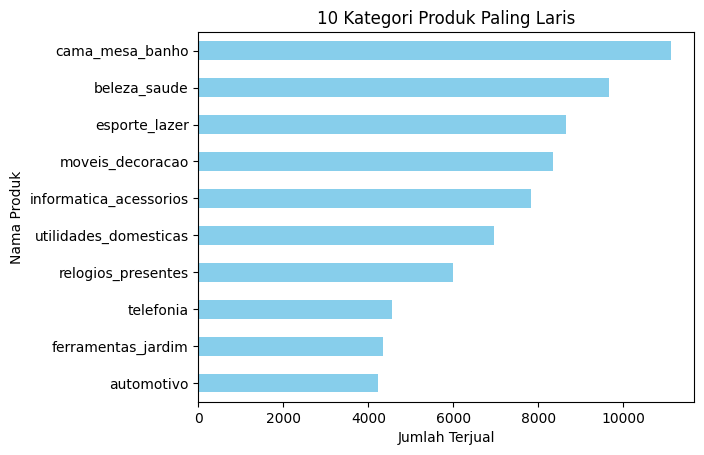

In [89]:
# Visualisasi Kategori produk yang paling Laris berdasarkan nama produk menggunakan bar chart
top_products_name.plot(kind='barh', color='skyblue')
plt.xlabel('Jumlah Terjual')
plt.ylabel('Nama Produk')
plt.title('10 Kategori Produk Paling Laris')
plt.show()

### Pertanyaan 2: Bagaimana Tren Bulanan dalam jumlah penjualan?

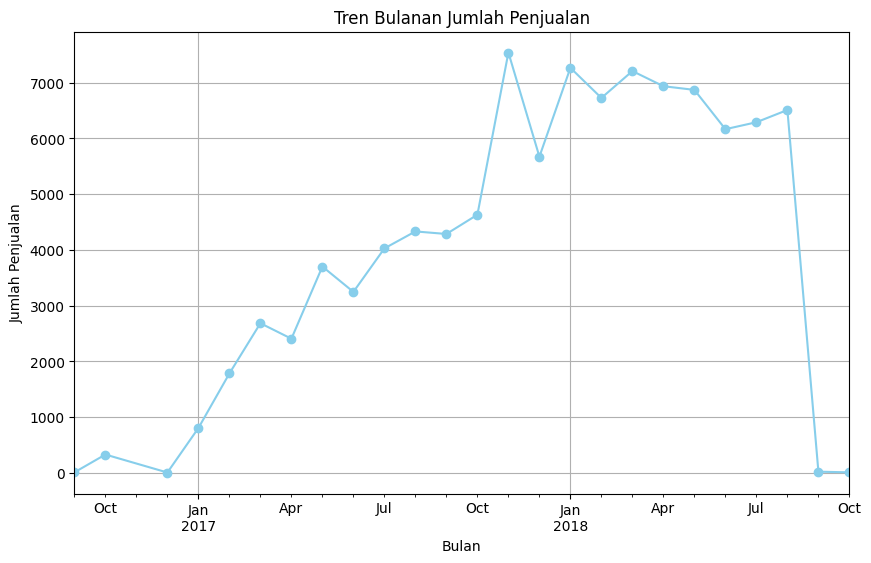

In [90]:
# Visualisasikan tren bulanan jumlah penjualan
plt.figure(figsize=(10, 6))
monthly_orders.plot(kind='line', marker='o', color='skyblue')
plt.title('Tren Bulanan Jumlah Penjualan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.grid(True)
plt.show()

### Pertanyaan 3: Bagaimana distribusi pelanggan terbanyak berdasarkan kota?

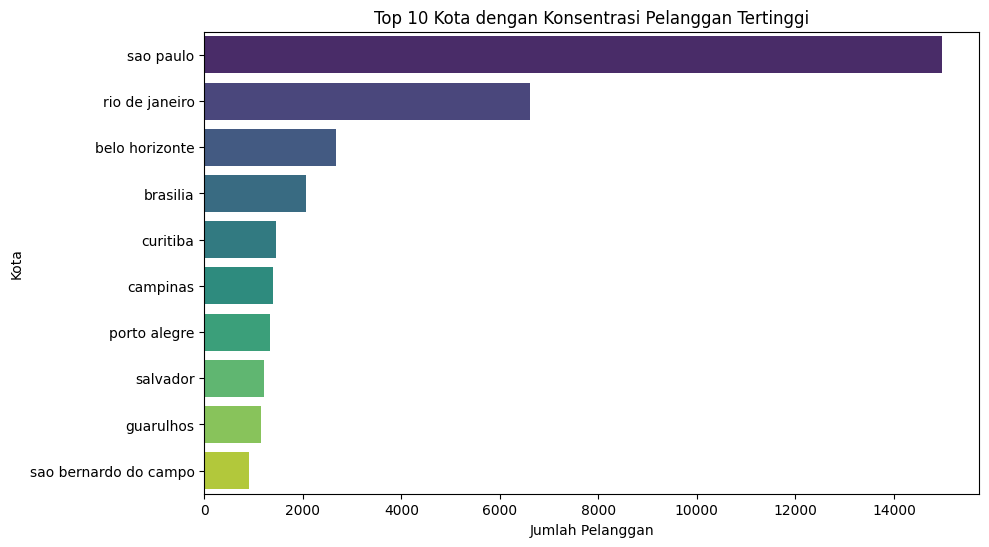

In [91]:
# Visualisasi diagram batang untuk 10 kota dengan pelanggan tertinggi
top_cities = 10
top_customer_count_per_city = customer_count_per_city.head(top_cities)
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_count', y='customer_city', data=top_customer_count_per_city, palette='viridis')
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Kota')
plt.title(f'Top {top_cities} Kota dengan Konsentrasi Pelanggan Tertinggi')
plt.show()

### Pertanyaan 4, 5, 6:
4.   Siapa pelanggan yang melakukan pembelian paling baru-baru ini?
5.   Siapa pelanggan yang frekuensi pembeliannya tertinggi dalam rentang beberapa bulan terakhir?
6.   Siapa pelanggan dengan pengeluaran yang paling banyak dalam rentang beberapa bulan terakhir?

In [92]:
rfm_df = all_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "total_price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_unique_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = order_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,163
2,0000f46a3911fa3c0805444483337064,1,86.22,586
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,370
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,337


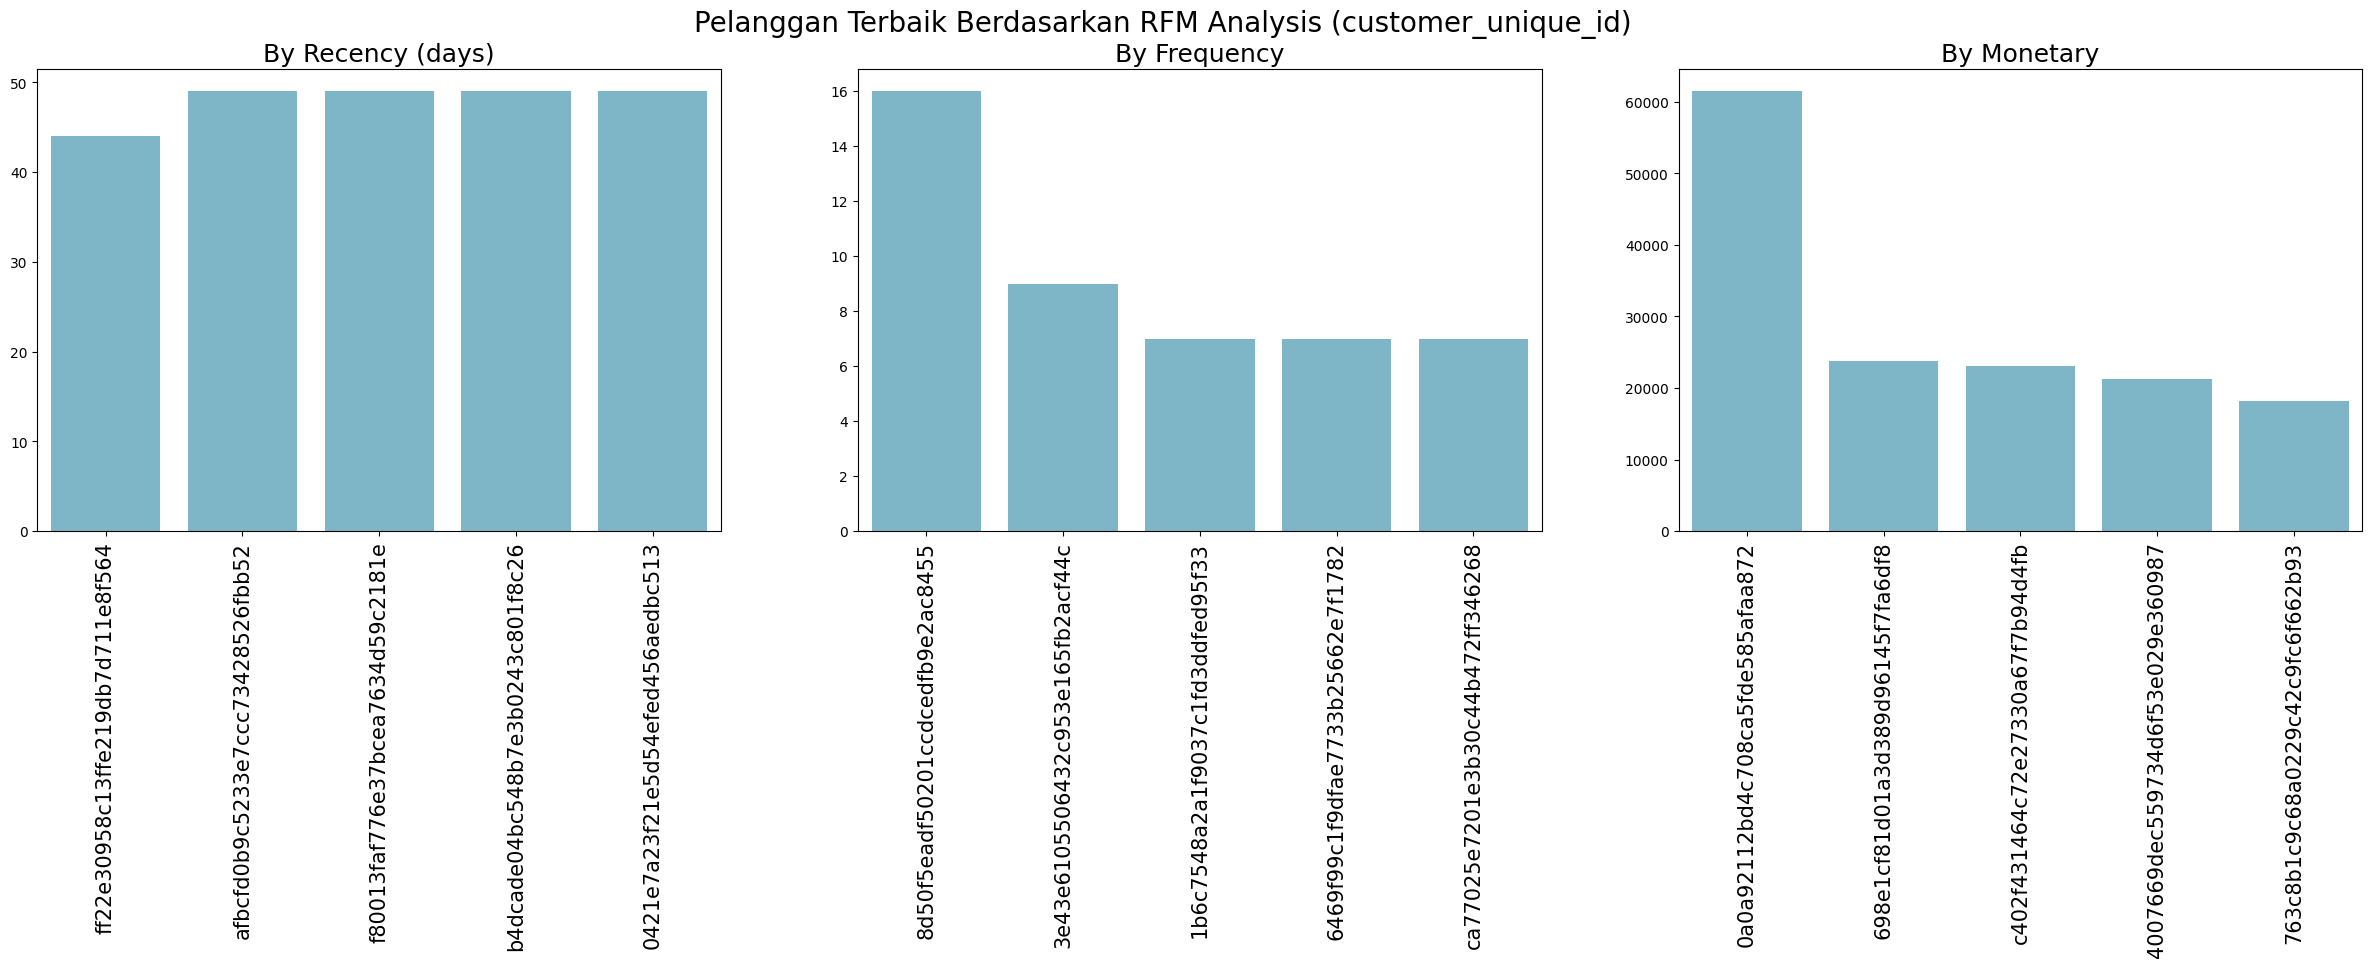

In [93]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_unique_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)  # Atur rotasi label sumbu x

sns.barplot(y="frequency", x="customer_unique_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)  # Atur rotasi label sumbu x

sns.barplot(y="monetary", x="customer_unique_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)  # Atur rotasi label sumbu x

plt.suptitle("Pelanggan Terbaik Berdasarkan RFM Analysis (customer_unique_id)", fontsize=20)
plt.show()

## Conclusion

- Kategori produk yang paling diminati atau paling sering dibeli adalah "cama mesa banho" berdasarkan data penjualan yang diamati yaitu sebanyak 11115
- Terdapat tren peningkatan pesanan dari tahun 2016 hingga 2017 dan 2018. Meskipun terdapat fluktuasi bulanan, secara keseluruhan terjadi peningkatan jumlah pesanan dari tahun ke tahun.
- Sao Paulo dan Rio de Janeiro merupakan kota dengan jumlah pelanggan terbanyak.
Sao Paulo memiliki jumlah pelanggan yang signifikan lebih tinggi dibandingkan dengan kota lainnya, dengan total 14984 pelanggan.
Rio de Janeiro, dengan 6620 pelanggan, merupakan kota kedua dengan jumlah pelanggan yang signifikan.
- Mayoritas pelanggan melakukan transaksi terakhir kurang dari 50 hari yang lalu, menunjukkan adanya aktivitas belanja yang relatif baru.
- Dari data transaksi, diketahui bahwa pelanggan dengan ID 8d50f5eadf50201ccdcedfb9e2ac8455 merupakan salah satu pelanggan yang sangat aktif, dengan melakukan transaksi sebanyak 16 kali.
- Dalam hal pendapatan (revenue), terbesar tercatat berasal dari pelanggan dengan ID 0a0a92112bd4c708ca5fde585afaa872, menunjukkan kontribusi signifikan dari pelanggan tersebut dalam total pendapatan perusahaan.

In [94]:
all_df.to_csv("all_data.csv", index=False)